## Problem Statement

Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medical, as it is one of the leading disease related to unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or averion. In this study, we experiment with the heart disease dataset to explore the machine learning algorithms and build an optimum model to predict the disease.                    

<a id='import_lib'></a>
#Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from pandas.api.types import is_string_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels
import statsmodels.api as sm
import pydotplus
from IPython.display import Image  
import graphviz

In [ ]:
! pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# Set Options

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)

<a id='RD'></a>
# Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_Heart = pd.read_csv("/content/drive/MyDrive/datasets/HeartDisease.csv")
df_Heart.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Dimensions of the data

In [ ]:
df_Heart.shape

(303, 14)

<a id='Data_Understanding'></a>
##  Understand the Dataset

<a id='Data_Types'></a>
###  Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

**Check for the data type**

In [ ]:
df_Heart.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

**Change the incorrect data type.**

In [ ]:
for col in ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']:
    df_Heart[col] = df_Heart[col].astype('object')

**Recheck the data type after the conversion.**

In [ ]:
df_Heart.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

In [ ]:
df_features = df_Heart.iloc[:, df_Heart.columns != 'target']
df_target = df_Heart.iloc[:,df_Heart.columns == 'target']

<a id='Summary_Statistics'></a>
###Summary Statistics

**For numerical variables, use the describe()**

In [ ]:
df_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**For categorical variables, use the describe(include=object)**

In [ ]:
df_features.describe(include='object').transpose()


,count,unique,top,freq
gender,303,2,1,207
chest_pain,303,4,0,143
fasting_blood_sugar,303,2,0,258
rest_ecg,303,3,1,152
exer_angina,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thalassemia,303,4,2,166


<a id='distribution_variables'></a>
### Distribution of Variables

####Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

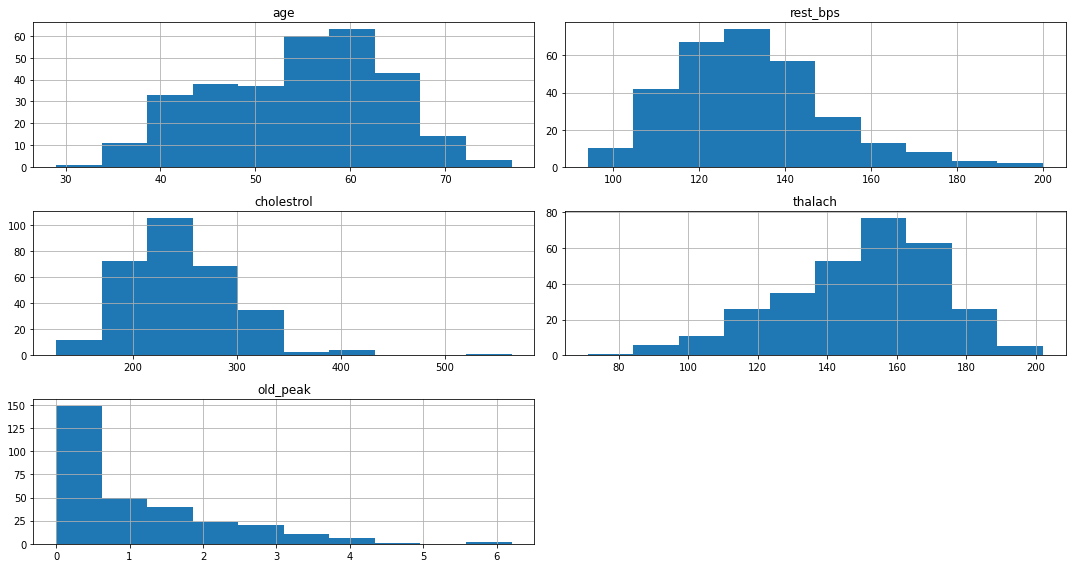

In [ ]:
df_features.hist()
plt.tight_layout()
plt.show()

####Distribution of categoric independent variables.

For the independent categoric variables, we plot the bar plot to check the distribution of each variables.

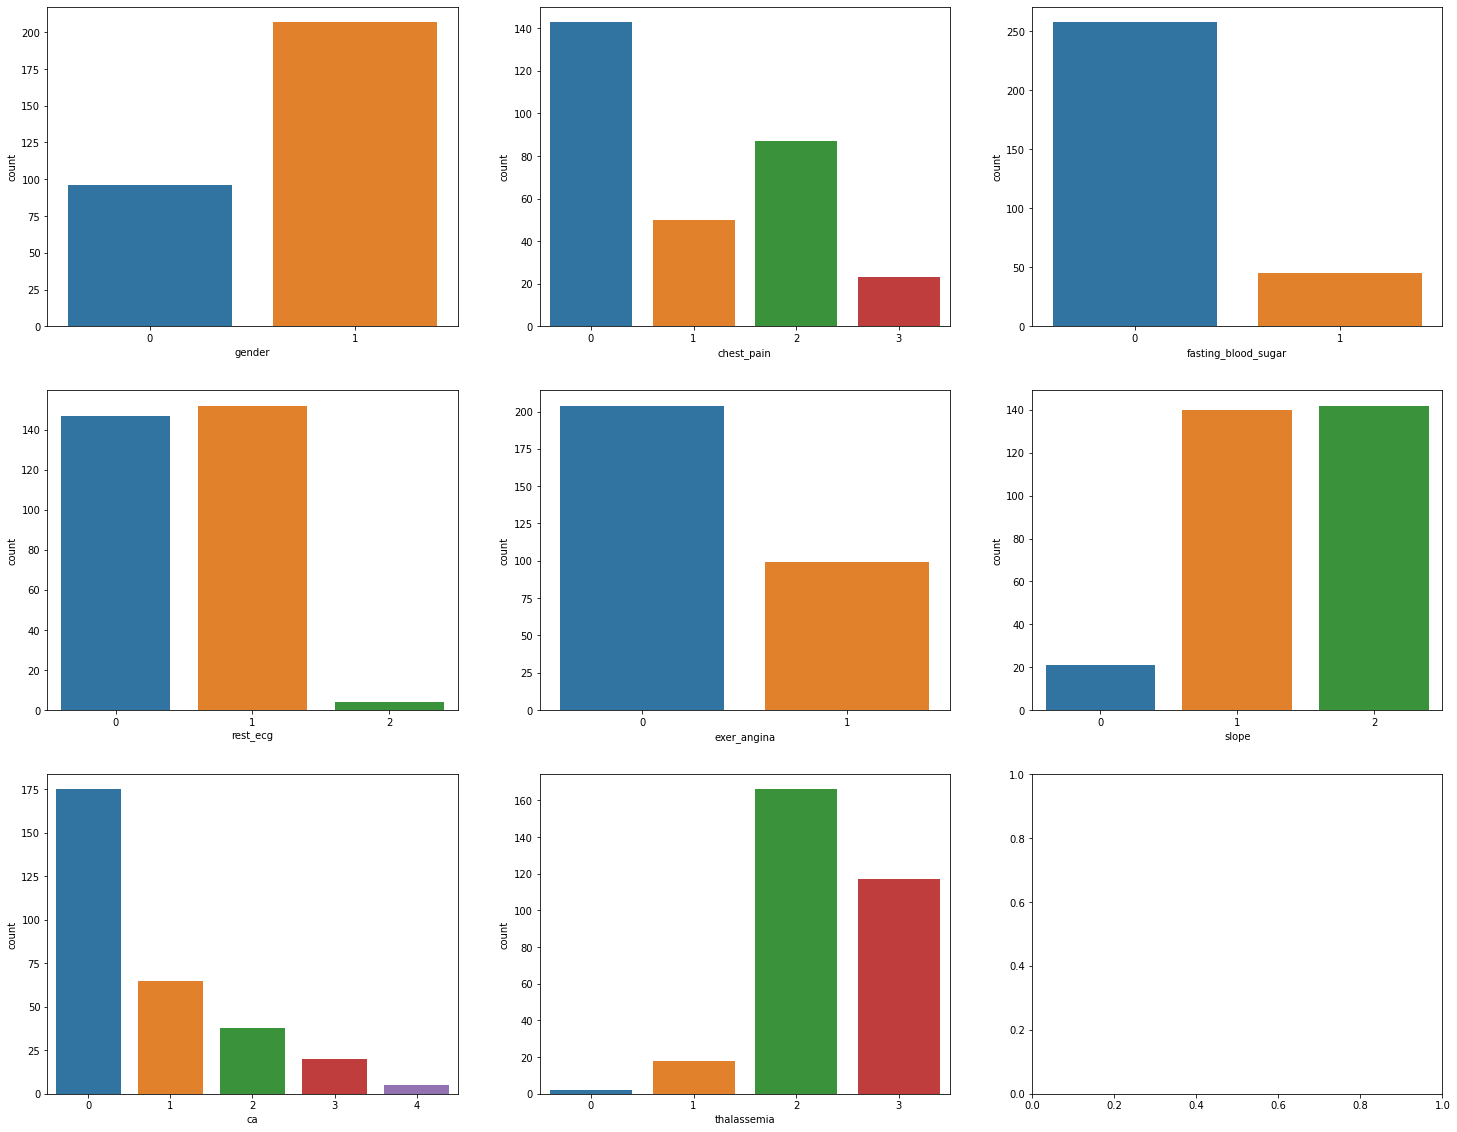

In [ ]:
categorical=[]
for column in df_features:
    if is_string_dtype(df_features[column]):
        categorical.append(column)
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(25, 20))
for variable, subplot in zip(categorical, ax.flatten()):
   sns.countplot(df_Heart[variable], ax = subplot)
plt.show()

####  Distribution of dependent variable.

we have split the dependent variable (target) and created a dataframe 'df_target'. Use this dataframe to check the distribution of target.

In [ ]:
class_frequency = df_target.target.value_counts()
class_frequency

1    165
0    138
Name: target, dtype: int64

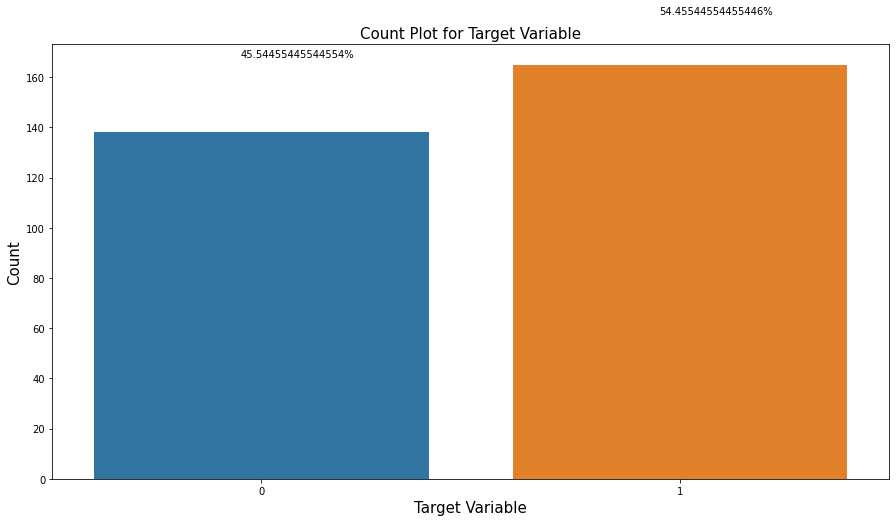

In [ ]:
sns.countplot(x = df_target.target)
plt.text(x = -0.05, y = df_target.target.value_counts()[0] + 30, s = str((class_frequency[0])*100/len(df_target.target)) + '%')
plt.text(x = 0.95, y = df_target.target.value_counts()[1] +20, s = str((class_frequency[1])*100/len(df_target.target)) + '%')
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

<a id='correlation'></a>
###  Correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

**Compute a correlation matrix**

In [ ]:
corr = df_features.corr()
corr

,age,rest_bps,cholestrol,thalach,old_peak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
rest_bps,0.279351,1.000000,0.123174,-0.046698,0.193216
cholestrol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
old_peak,0.210013,0.193216,0.053952,-0.344187,1.000000


**Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

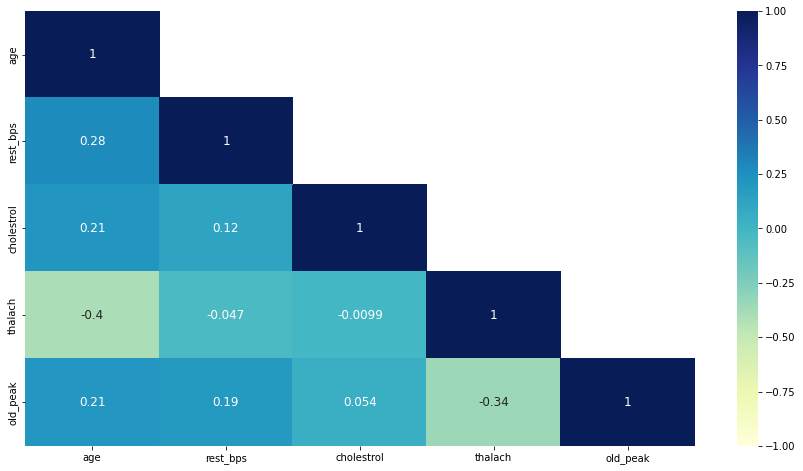

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)
plt.show()

<a id='outliers'></a>
###  Discover Outliers 

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

**Plot the boxplot for numeric data**

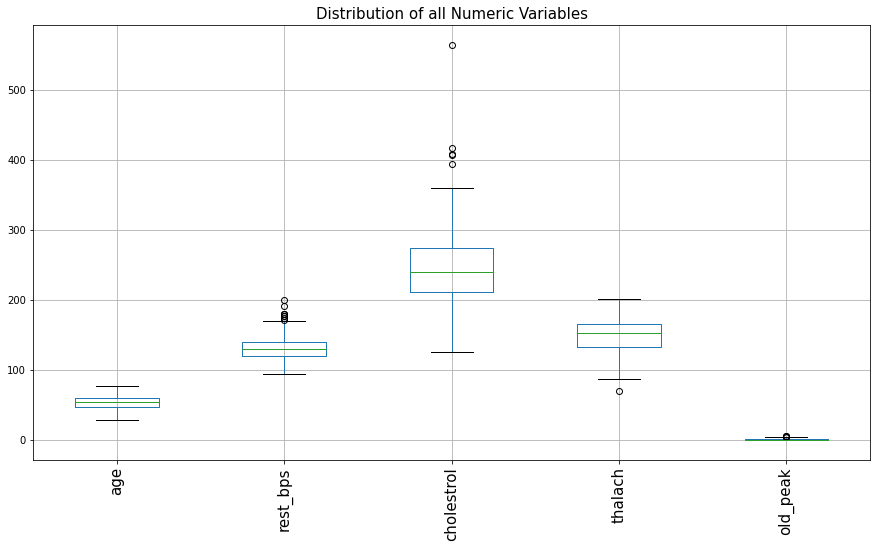

In [ ]:
df_features.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

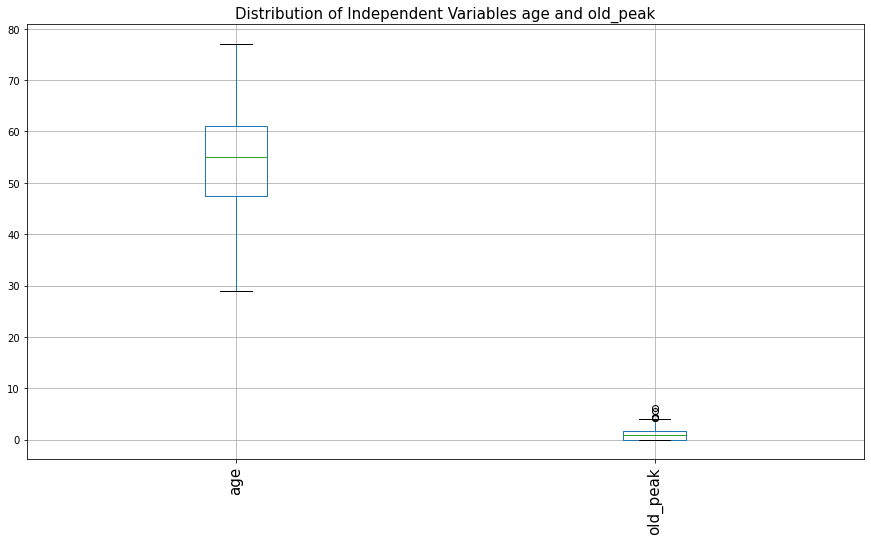

In [ ]:
cols = [ 'age','old_peak']
df_features[cols].boxplot()
plt.title('Distribution of Independent Variables age and old_peak', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

**Remove outliers by IQR method**

In [ ]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           13.5
rest_bps      20.0
cholestrol    63.5
thalach       32.5
old_peak       1.6
dtype: float64


In [ ]:
df_Heart = df_Heart[~((df_Heart < (Q1 - 1.5 * IQR)) | (df_Heart > (Q3 + 1.5 * IQR))).any(axis=1)]
df_Heart = df_Heart.reset_index(drop = True)

**Plot the boxplot to recheck for outliers**

We plot the boxplots for all variables except for the variable `white corpuscle` for better visualization.

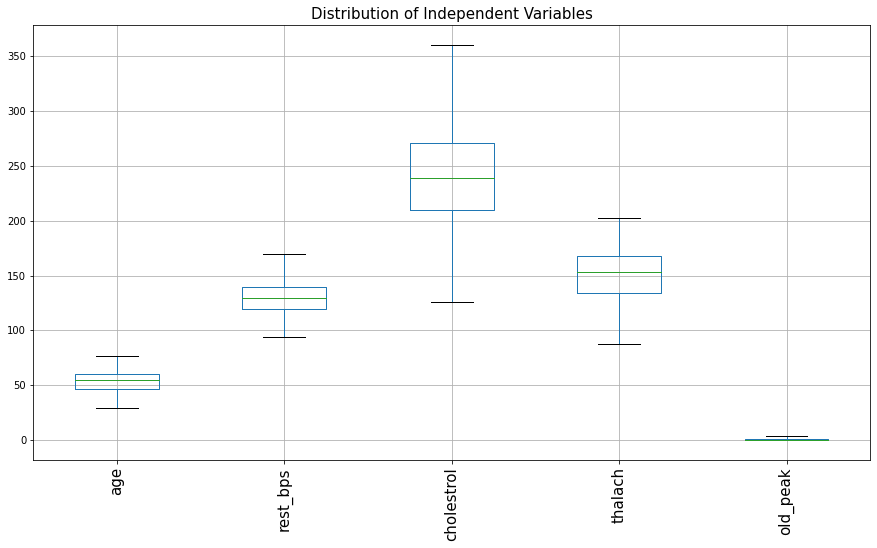

In [ ]:
cols = ['age','rest_bps','cholestrol','thalach','old_peak']
df_Heart[cols].boxplot()
plt.title('Distribution of Independent Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [ ]:
df_Heart.shape

(284, 14)

<a id='Missing_Values'></a>
###Missing Values

In [ ]:
Total = df_Heart.isnull().sum().sort_values(ascending = False)          
Percent = (df_Heart.isnull().sum()*100/df_Heart.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
age,0,0.0
gender,0,0.0
chest_pain,0,0.0
rest_bps,0,0.0
cholestrol,0,0.0
fasting_blood_sugar,0,0.0
rest_ecg,0,0.0
thalach,0,0.0
exer_angina,0,0.0
old_peak,0,0.0


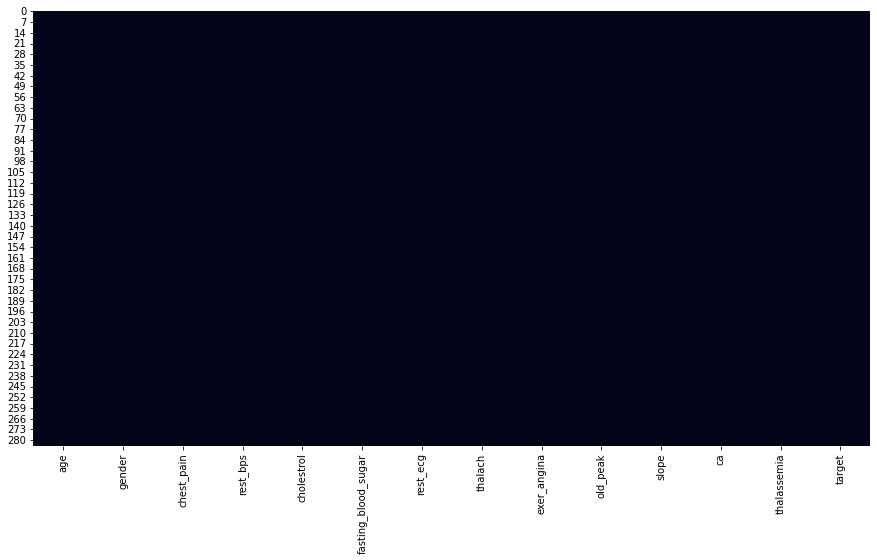

In [ ]:
sns.heatmap(df_Heart.isnull(), cbar=False)
plt.show()

<a id='Data_Preparation'></a>
##Prepare the Data

To build the classification models, we need to encode the categorical variables using dummy encoding.

**Filter numerical and categorical variables**

In [ ]:
df_cat = df_Heart[categorical]
df_num = df_Heart.drop(categorical, axis = 1)

**Dummy encode the categorical variables**

In [ ]:
df_cat.head()

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [ ]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

In [ ]:
df_cat_dummies.head()

,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


**Concatenate numerical and dummy encoded categorical variables**

In [ ]:
df_Heart_dummy = pd.concat([df_num, df_cat_dummies], axis=1)
df_Heart_dummy.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


After removal of outliers and missing values in the data, the dataframe `df_Heart_dummy` contains independent as well as dependent variables.

In [ ]:
y = pd.DataFrame(df_Heart_dummy['target'])

In [ ]:
X = df_Heart_dummy.drop('target',axis = 1)

In [ ]:
X.head()

,age,rest_bps,cholestrol,thalach,old_peak,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


#### Create a generalized function to calculate the metrics for the test set.

In [ ]:
def get_test_report(model):
   return(classification_report(y_test, y_pred))

#### Create a generalized function to calculate the kappa score for the test set.

In [ ]:
def kappa_score(model):
    return(cohen_kappa_score(y_test, y_pred))

#### Define a function to plot the confusion matrix.

In [ ]:
def plot_confusion_matrix(model):
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

#### Define a function to plot the ROC curve.

In [ ]:
def plot_roc(model):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    plt.grid(True)

#### Create a generalized function to create a dataframe containing the scores for the models.

In [ ]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    
    global score_card

    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

<a id='DecisionTree'> </a>
# Decision Tree

Decision Tree is a non-parametric supervised learning method. It builds a regression model in the form of a tree structure. It breaks down a data set into smaller and smaller subsets, which is called splitting. The final result is a tree with a decision and leaf nodes. A decision node has two or more branches. The leaf node represents a class or decision. The topmost decision node in a tree that corresponds to the best predictor called 'root node'. The decision tree is built using different criteria like gini index, and entropy. 

**Split the data into training and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (198, 22)
X_test (86, 22)
y_test (86, 1)


**Build the model**

We build the decision tree on the `unscaled features`.

We build the decision tree on the `unscaled features`.

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree_model = decision_tree.fit(X_train, y_train)

#### Plot the decision tree

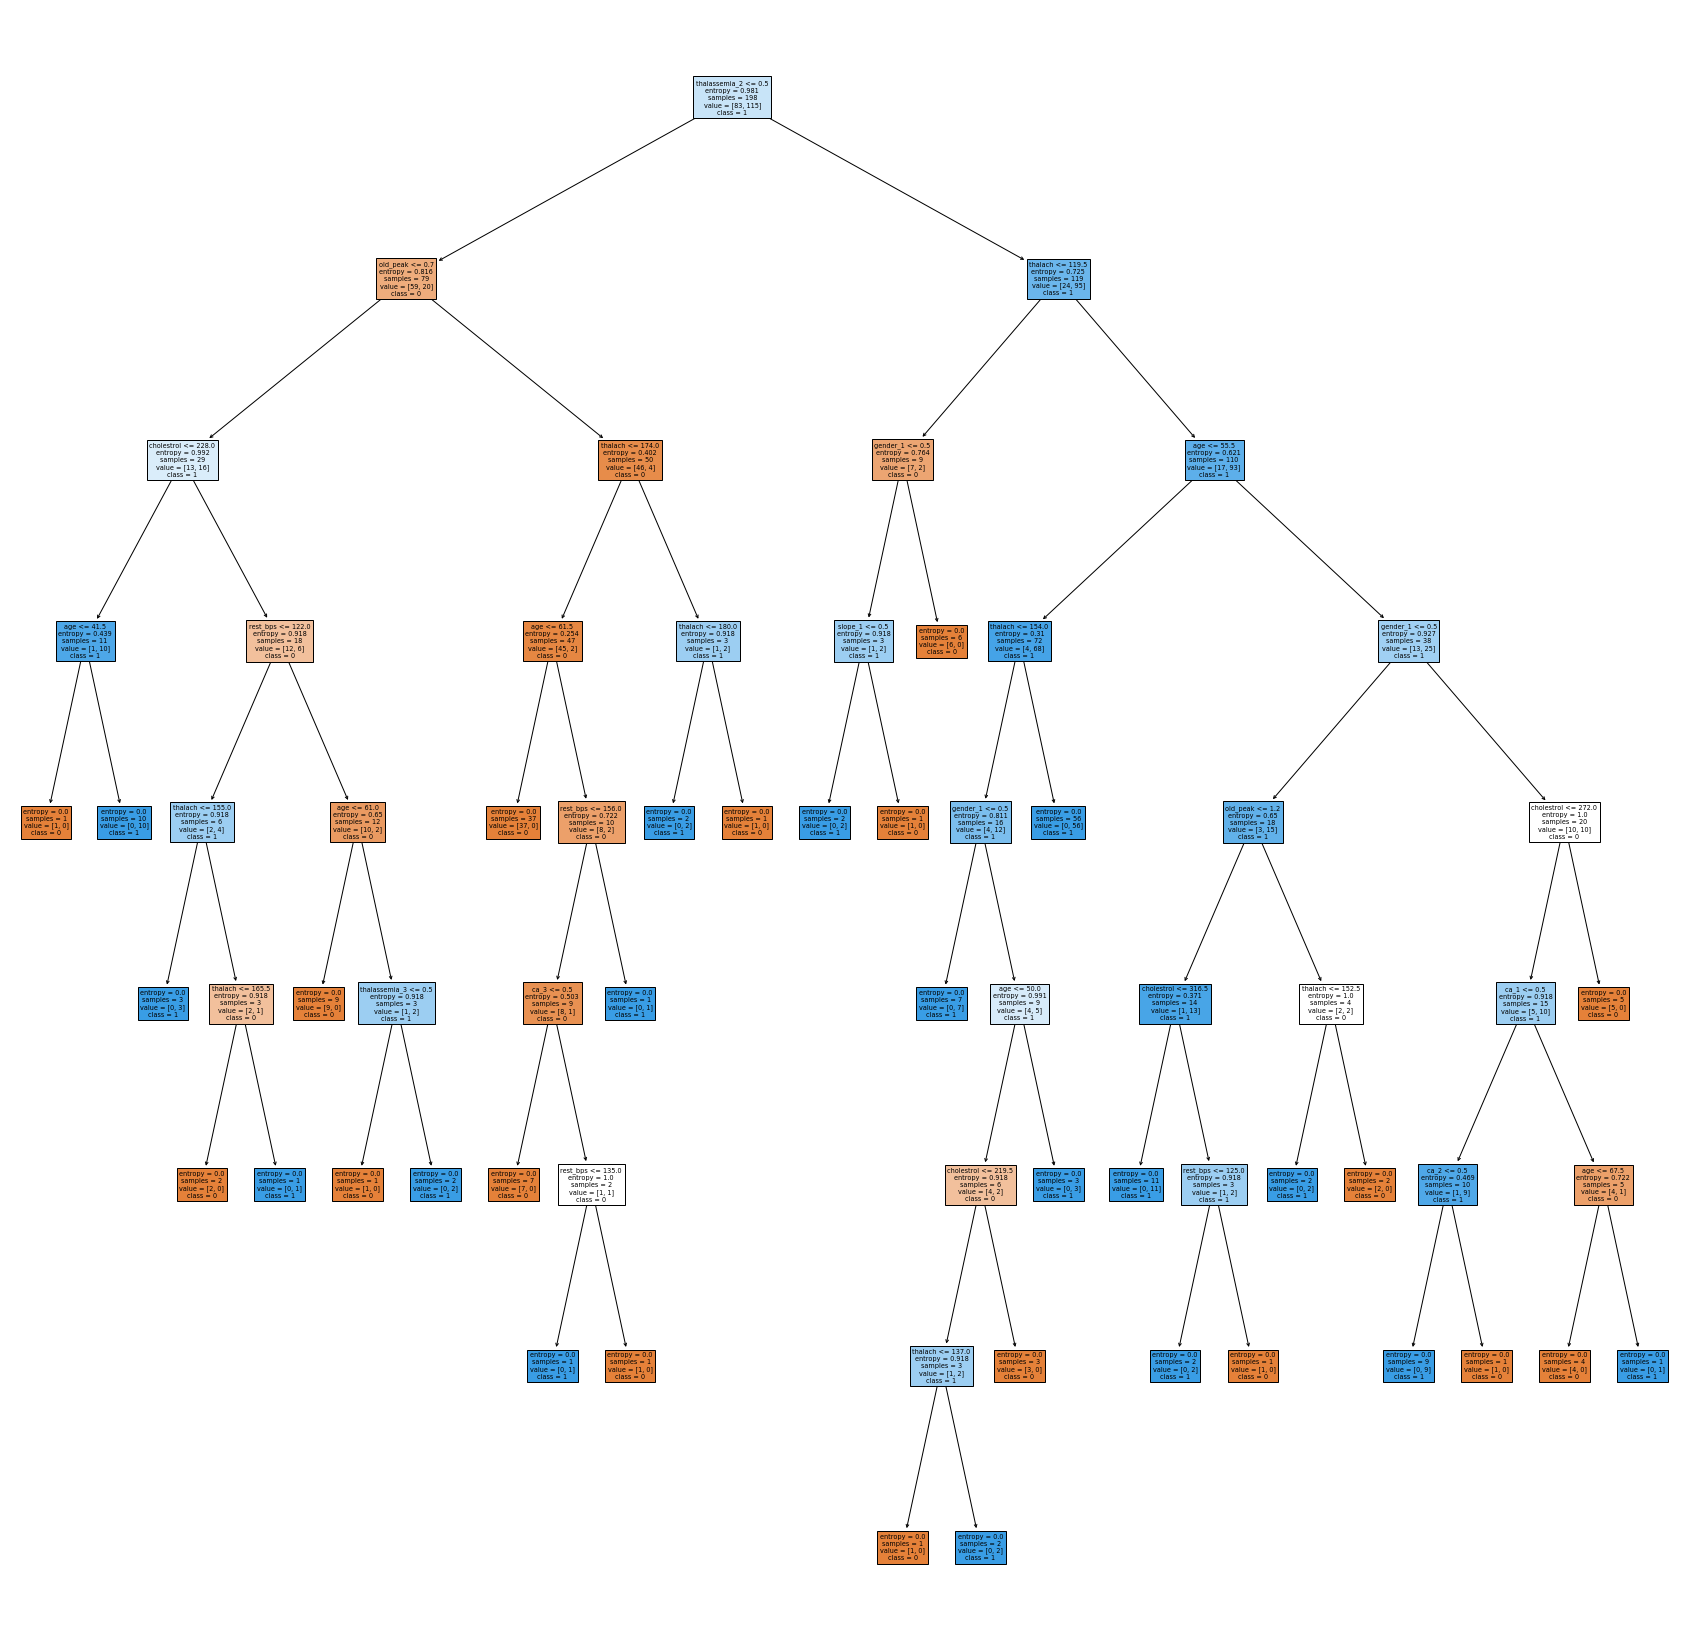

In [ ]:
lables = X_train.columns
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

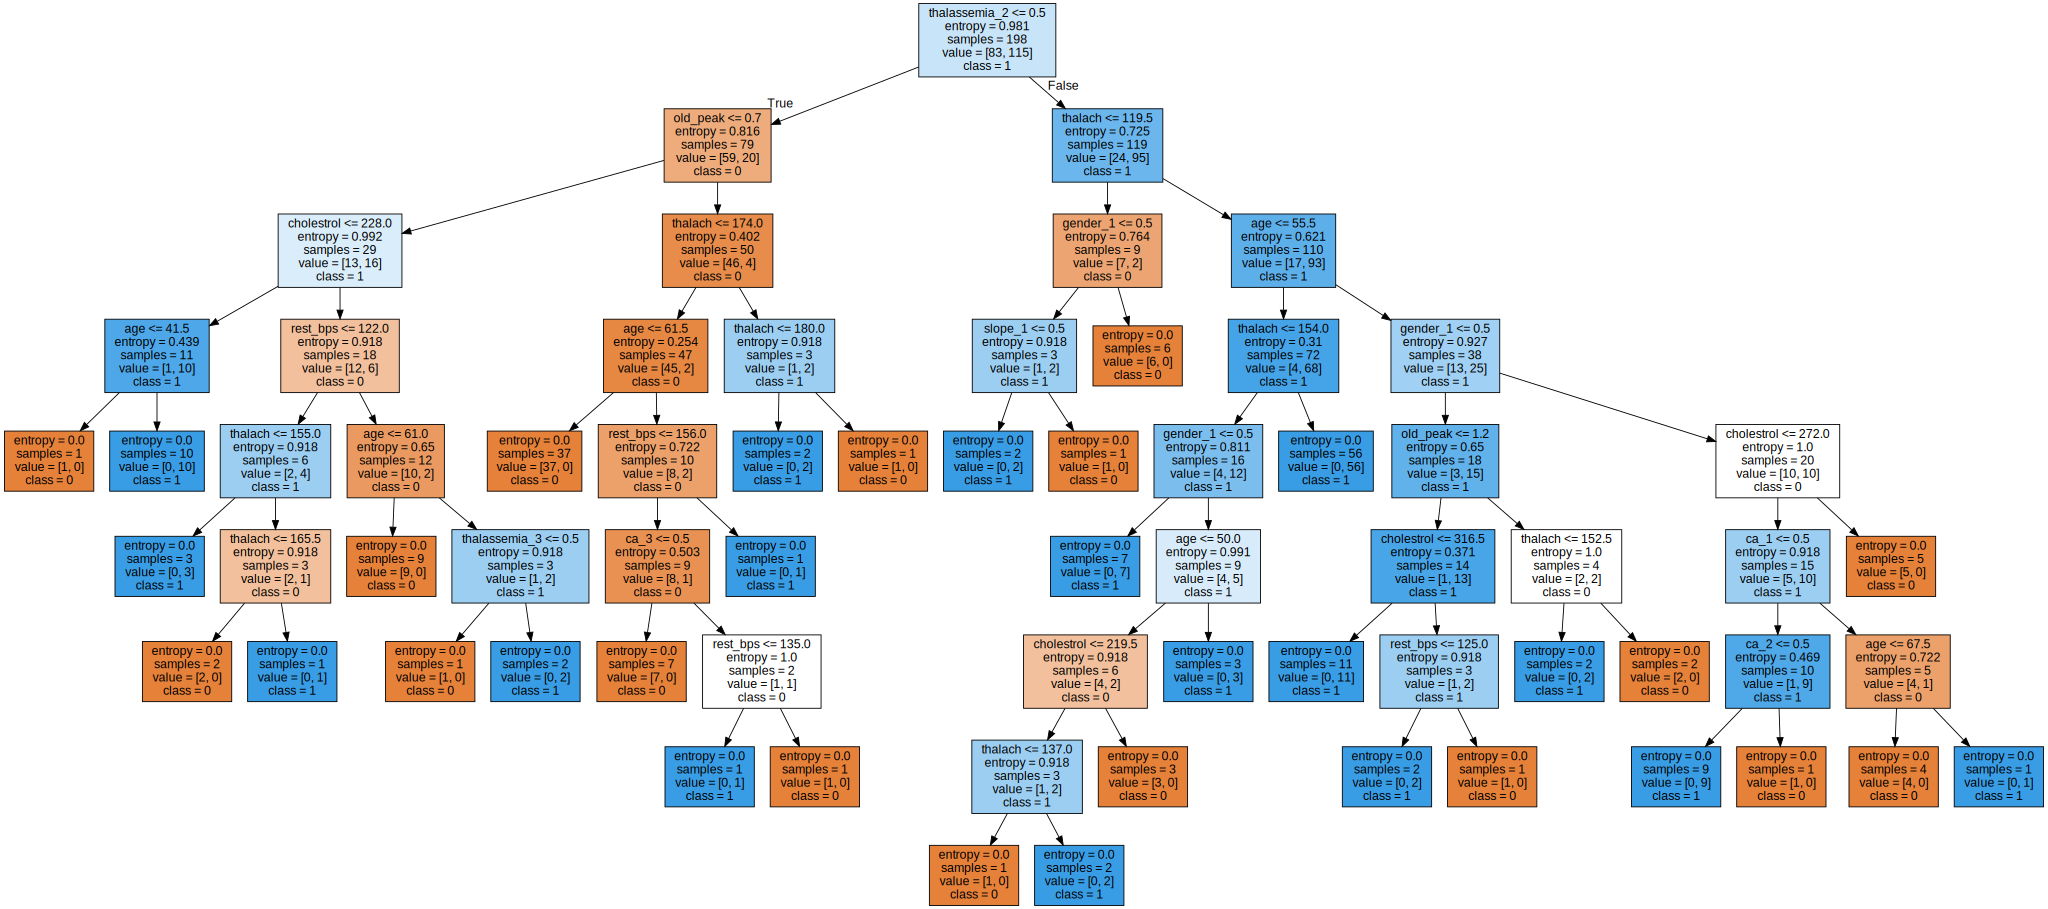

In [ ]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                                feature_names=lables,  
                                class_names=["0","1"],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph


** Do predictions on the test set**

In [ ]:
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]

In [ ]:
y_pred = decision_tree_model.predict(X_test)

** Compute accuracy measures**

#### Build a confusion matrix.

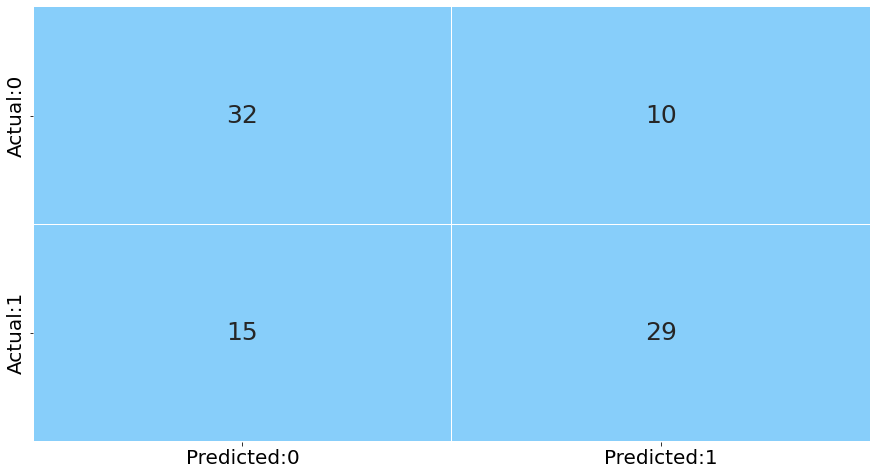

In [ ]:
plot_confusion_matrix(decision_tree_model)

**Calculate performance measures on the test set.**

In [ ]:
test_report = get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        42
           1       0.74      0.66      0.70        44

    accuracy                           0.71        86
   macro avg       0.71      0.71      0.71        86
weighted avg       0.71      0.71      0.71        86



**Interpretation:** The accuracy is 71% for this model. Also, the sensitivity and specificity of the model is quite different.

In [ ]:
kappa_value = kappa_score(decision_tree_model)
print(kappa_value)

0.41985968699406373


**Interpretation:** As the kappa score for the decision tree (pruned) is 0.4198, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

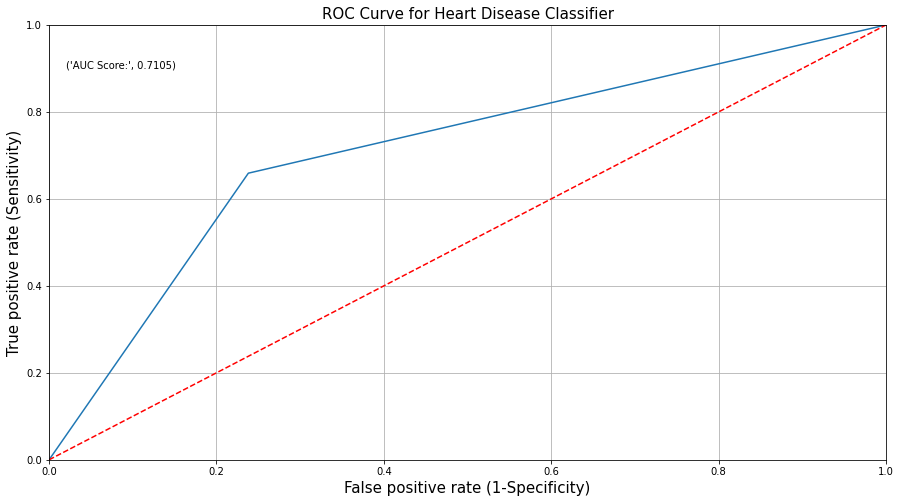

In [ ]:
plot_roc(decision_tree_model)

** Tabulate the results**

In [ ]:
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.74359,0.659091,0.709302,0.41986,0.698795


<a id='DecisionTreePruning'></a>
## Prune a Decision Tree 

**Prune the decision tree**

We prune the decision tree by specifying the maximum depth and maximum number of leaves of the tree. 

We use the unscaled features to build the tree.

In [ ]:
prune = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 25 , random_state = 10)
decision_tree_prune = prune.fit(X_train, y_train)

####  Plot the decision tree

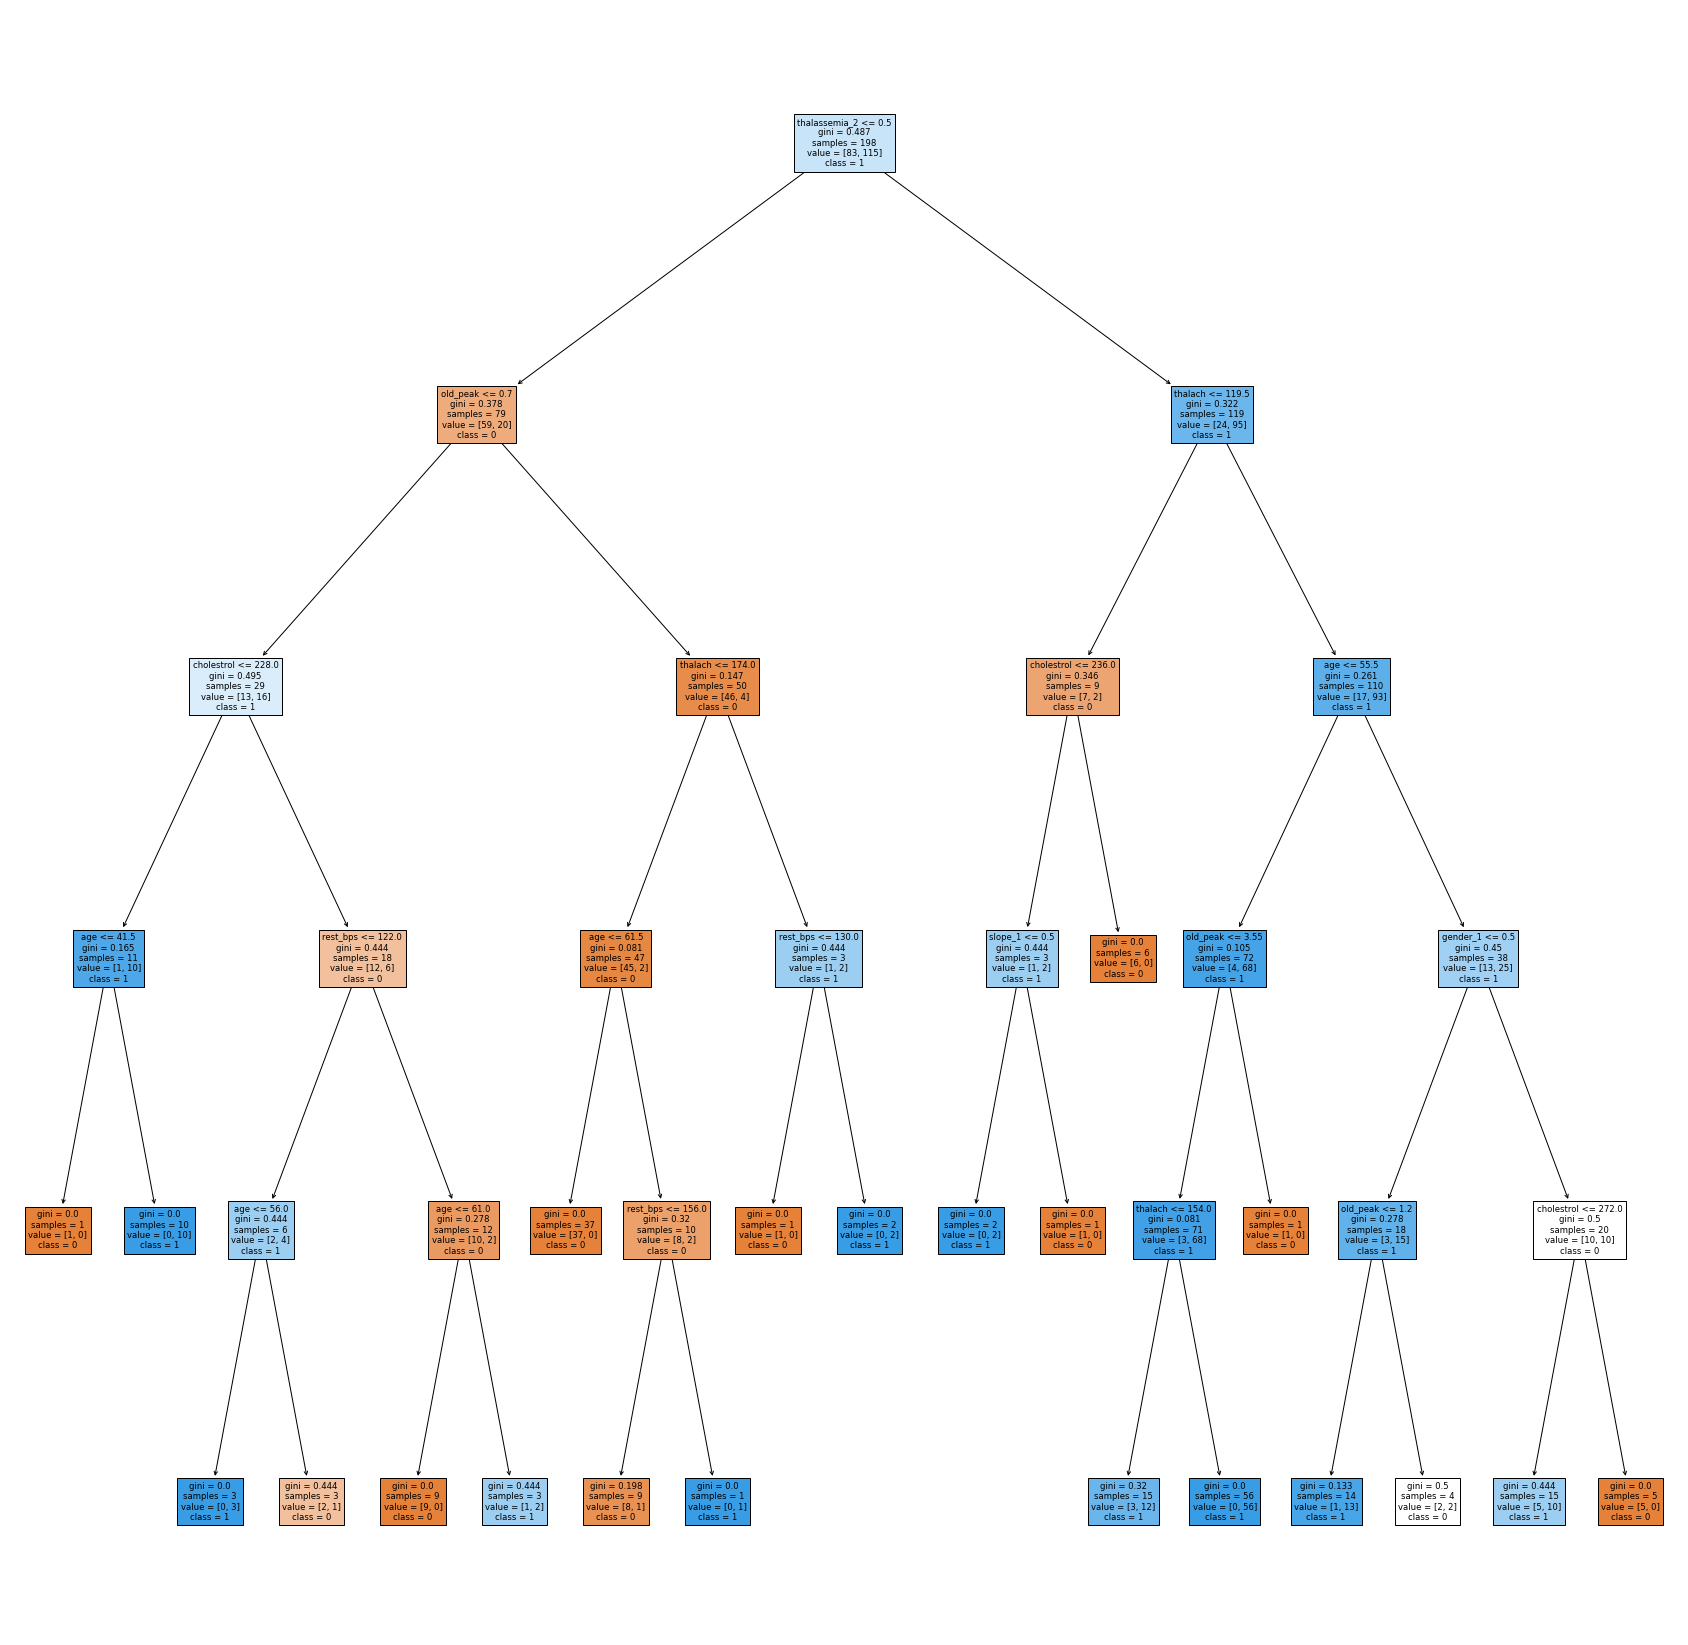

In [ ]:
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_prune, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

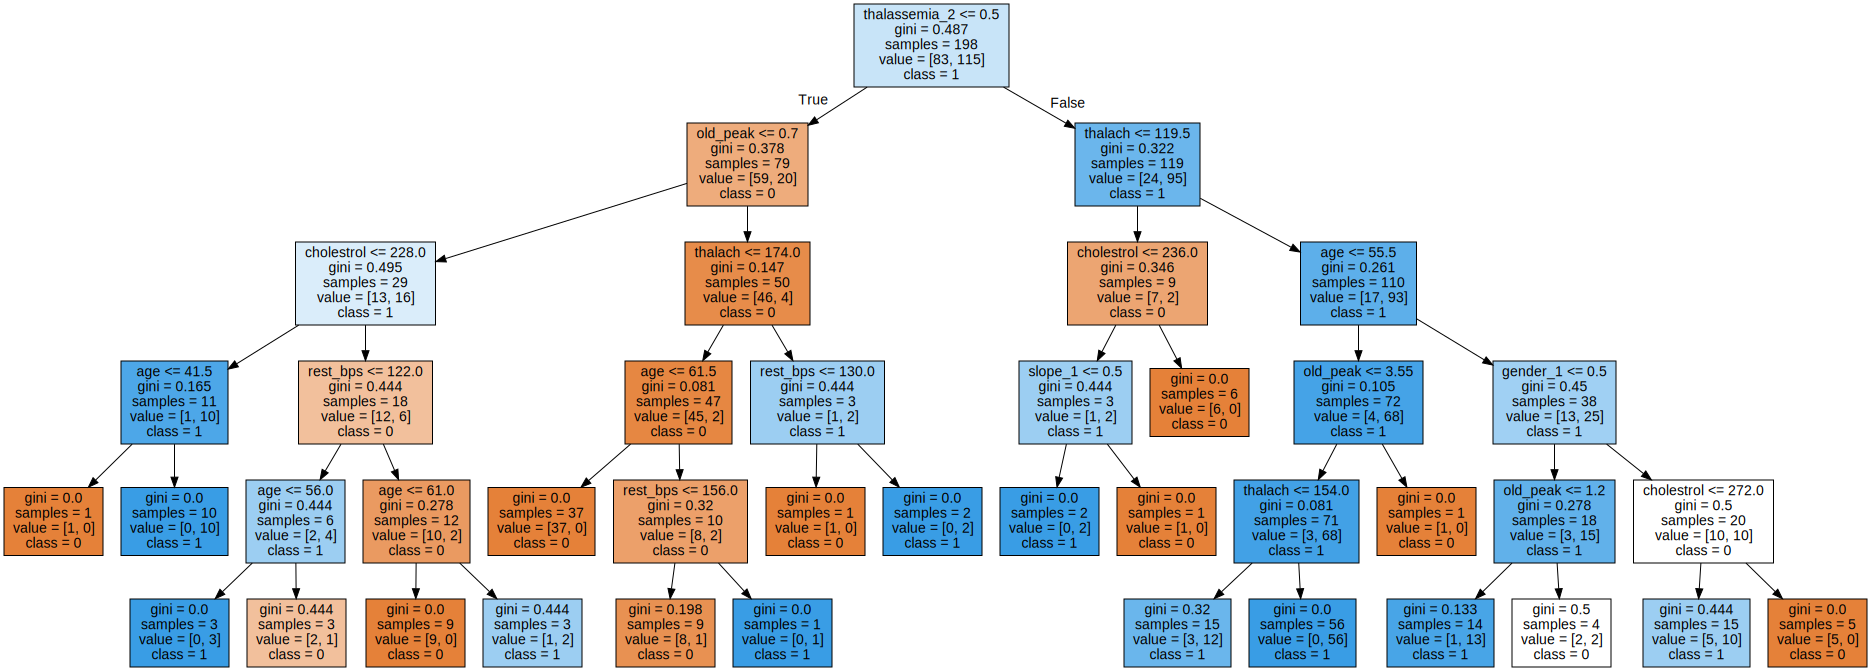

In [ ]:
dot_data = tree.export_graphviz(decision_tree_prune, out_file=None, 
                                feature_names=lables,  
                                class_names=["0","1"],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph


**Do predictions on the test set**

In [ ]:
y_pred_prob = decision_tree_prune.predict_proba(X_test)[:,1]

In [ ]:
y_pred = decision_tree_prune.predict(X_test)

**Compute accuracy measures**

#### Build a confusion matrix.

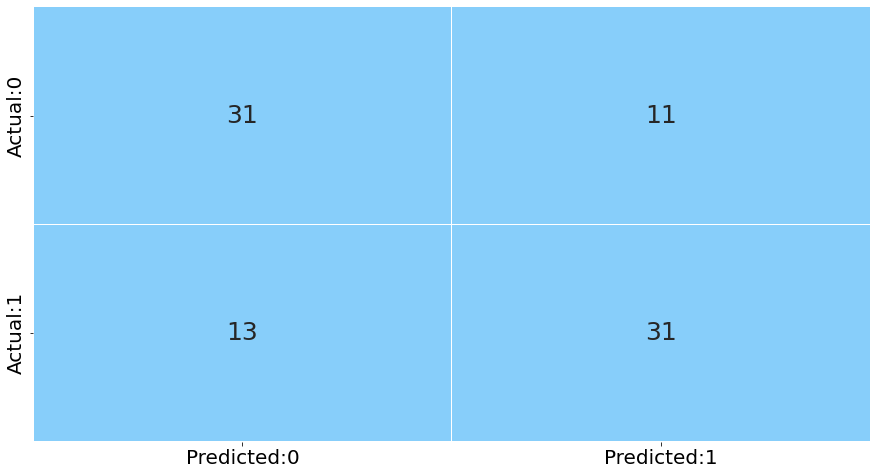

In [ ]:
plot_confusion_matrix(decision_tree_prune)

**Calculate performance measures on the test set.**

In [ ]:
test_report = get_test_report(decision_tree_prune)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.74      0.70      0.72        44

    accuracy                           0.72        86
   macro avg       0.72      0.72      0.72        86
weighted avg       0.72      0.72      0.72        86



**Interpretation:** The accuracy is 72% for this model.

In [ ]:
kappa_value = kappa_score(decision_tree_prune)
print(kappa_value)

0.4421621621621622


**Interpretation:** As the kappa score for the decision tree (pruned) is 0.4421, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

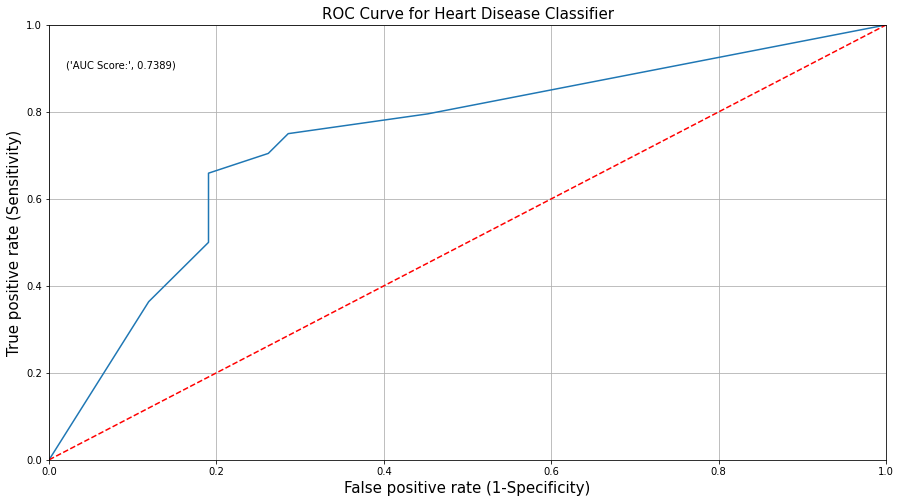

In [ ]:
plot_roc(decision_tree_prune)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br><br>
We see our classifier (decision tree with pruning) to be away from the dotted line with the AUC score 0.7389.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**Tabulate the results**

In [ ]:
update_score_card(model_name = 'Decision Tree (Pruned)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,Decision Tree (Pruned),0.738907,0.738095,0.704545,0.720930,0.442162,0.720930


<a id='DecisionTreewithGridSearchCv'> </a>
##Decision Tree (using GridSearchCV)

Now we show how a decision tree is optimized by cross-validation, which is done using the `GridSearchCV()` from sklearn library.

The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.

**Use GridSearch to obtain the optimal values of hyperparameters**

In [ ]:
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [ ]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

dt_grid = grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 25, 'min_samples_split': 10} 



**Build the model using the hyperparameters obtained in step 1**

In [ ]:
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

dt_grid_model = dt_grid_model.fit(X_train, y_train)

####Plot the decision tree

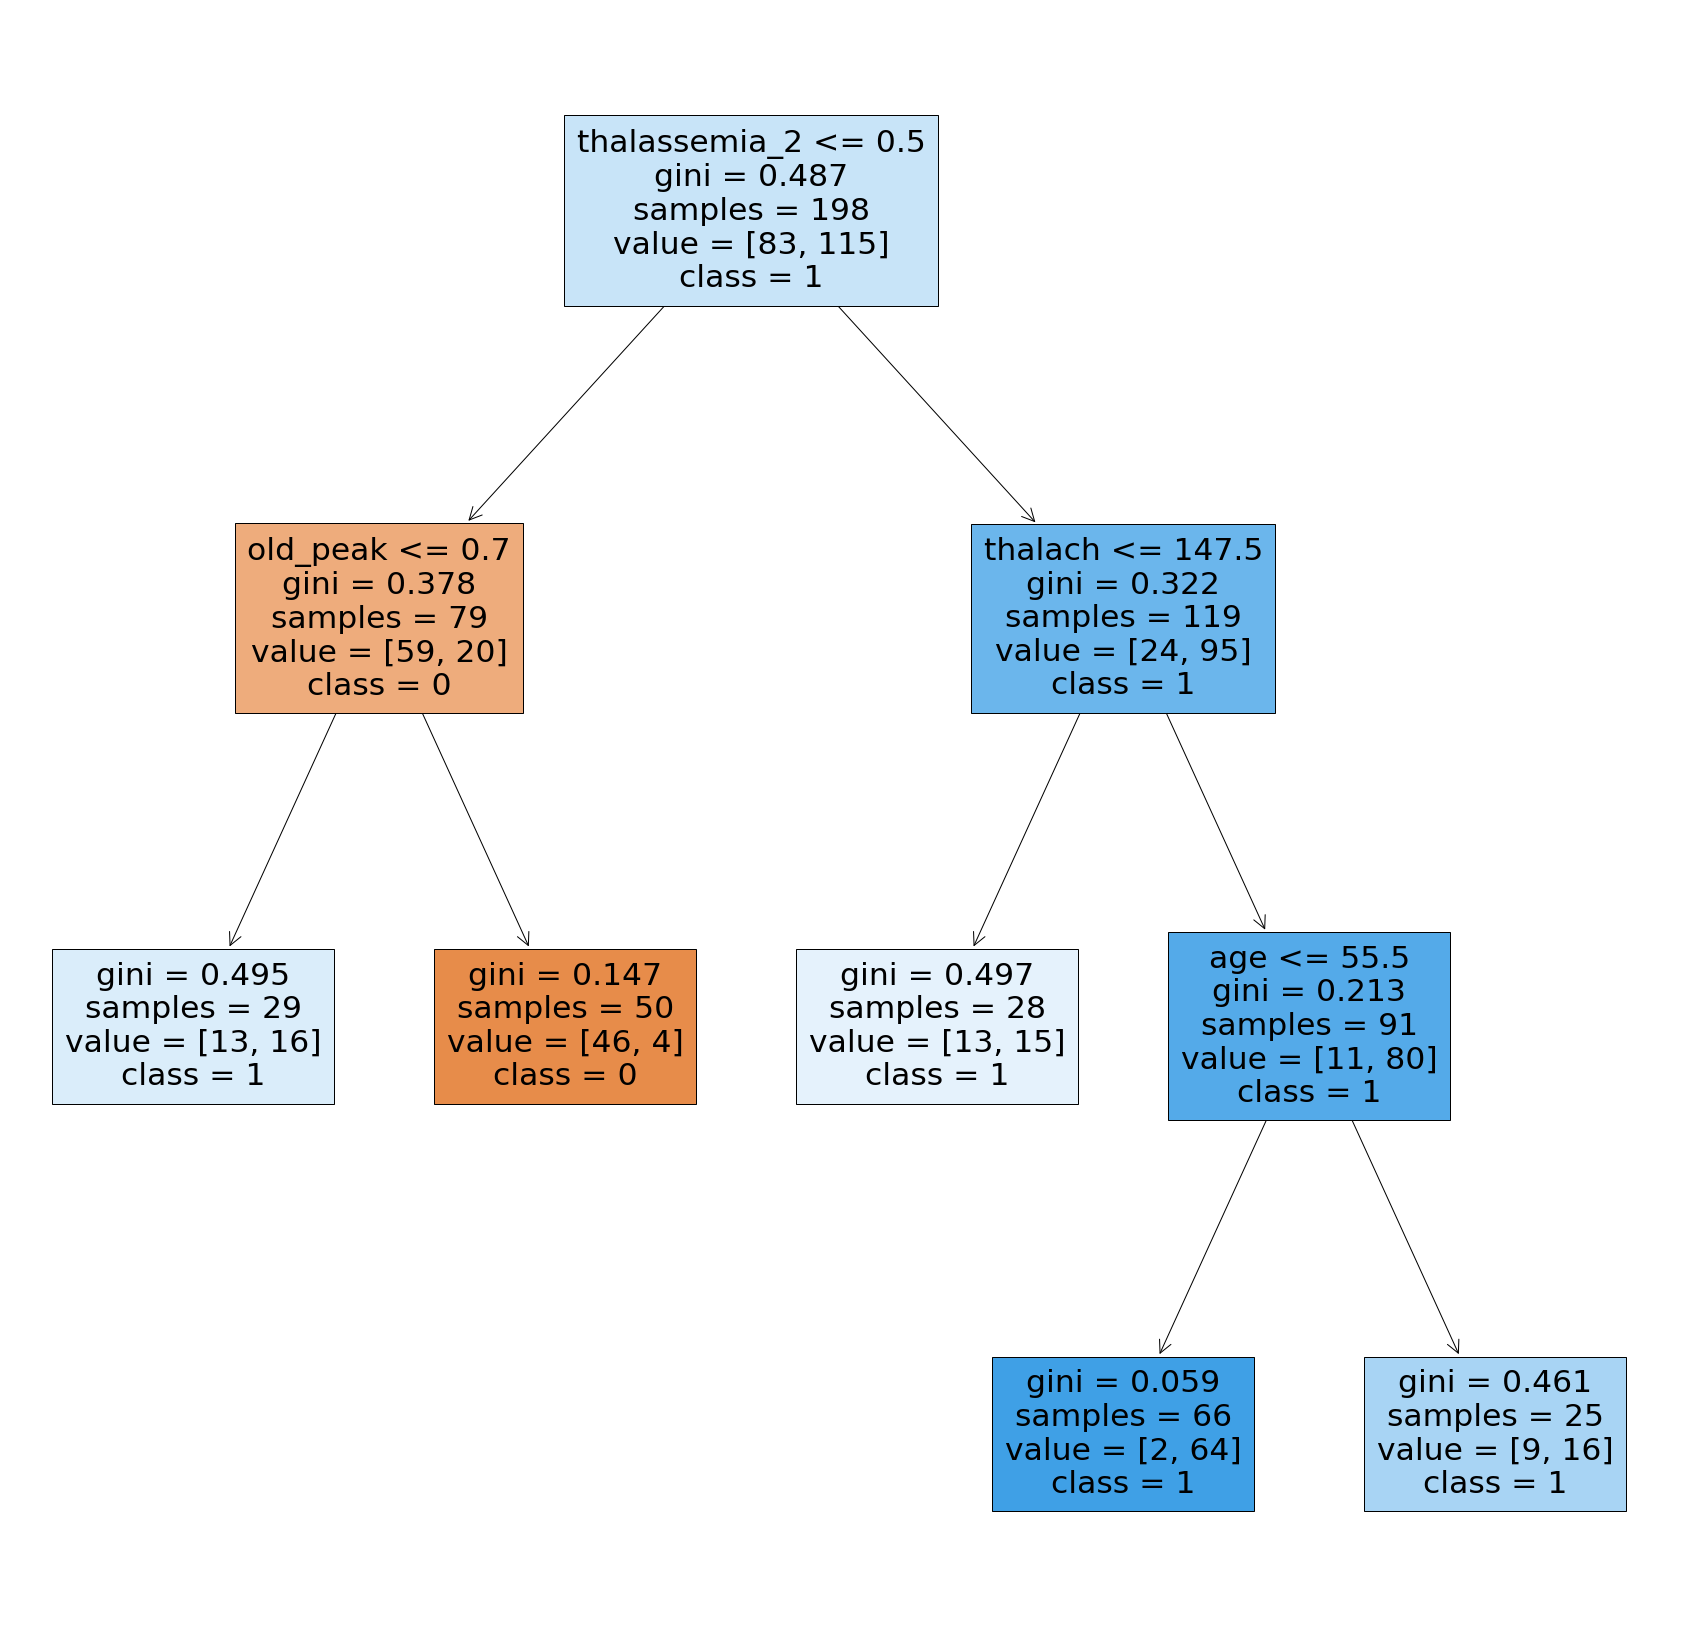

In [ ]:
lables = X_train.columns

fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_grid_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

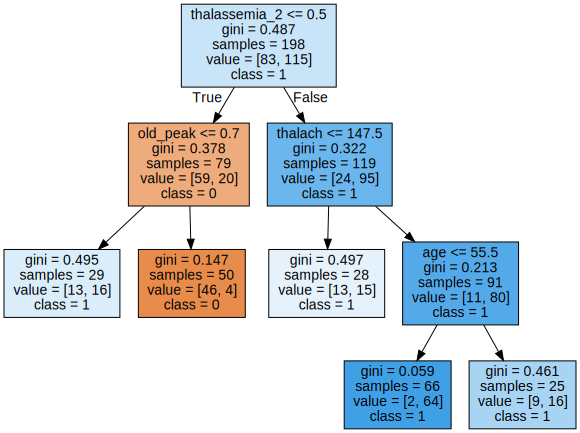

In [ ]:

dot_data = tree.export_graphviz(dt_grid_model, out_file=None, 
                                feature_names=lables,  
                                class_names=["0","1"],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph


**Do predictions on the test set**

In [ ]:
y_pred_prob = dt_grid_model.predict_proba(X_test)[:,1]

In [ ]:
y_pred = dt_grid_model.predict(X_test)

**Compute accuracy measures**

#### Build a confusion matrix.

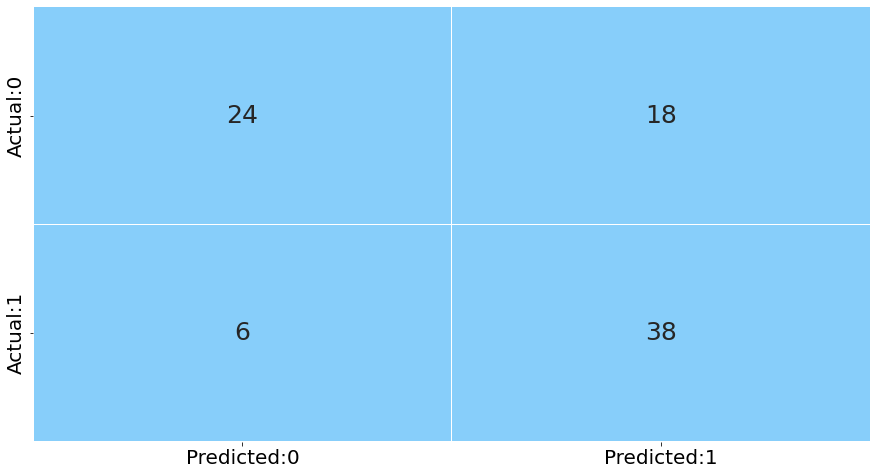

In [ ]:
plot_confusion_matrix(dt_grid_model)

**Calculate performance measures on the test set.**

In [ ]:
test_report = get_test_report(dt_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        42
           1       0.68      0.86      0.76        44

    accuracy                           0.72        86
   macro avg       0.74      0.72      0.71        86
weighted avg       0.74      0.72      0.71        86



**Interpretation:** The accuracy is 72% for this model.

In [ ]:
kappa_value = kappa_score(dt_grid_model)
print(kappa_value)

0.43790849673202614


**Interpretation:** As the kappa score for the decision tree (GridSearchCV) is 0.4379, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

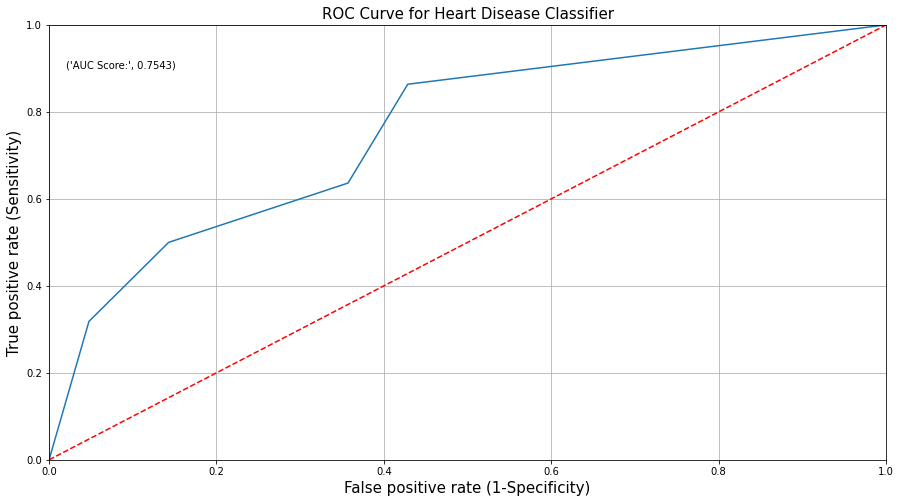

In [ ]:
plot_roc(dt_grid_model)

<a id="conclusion"> </a>
#Conclusion and Interpretation

To take the final conclusion, let us print the result table.

**Tabulate the results**

In [ ]:
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,Decision Tree (Pruned),0.738907,0.738095,0.704545,0.720930,0.442162,0.720930
2,Decision Tree (GridSearchCV),0.754329,0.678571,0.863636,0.720930,0.437908,0.760000
